# SkimLit - NLP project

In [1]:
# !git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git # get the data here
# !ls pubmed-rct

In [2]:
data_dir = 'PubMed_200k_RCT_numbers_replaced_with_at_sign/'

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
# Check all of the filenames in the target directory
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['PubMed_200k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'PubMed_200k_RCT_numbers_replaced_with_at_sign/test.txt',
 'PubMed_200k_RCT_numbers_replaced_with_at_sign/train.txt']

## Data Preprocessing

In [5]:
# Function to read the lines of a document
def get_lines(filename):
    with open(filename, 'r') as file:
        return file.readlines()
    
# Read in the training lines
train_lines = get_lines(data_dir + 'train.txt') 

In [6]:
def preprocess_text_with_lines(filename):
    input_lines = get_lines(filename)
    abstract_lines = "" # Create an empty abstract
    abstract_samples = [] # Create an empty list of abstracts

    # Loop through each line in the target file
    for line in input_lines:
        if line.startswith('###'):
            abstract_id = line
            abstract_lines = "" # Reset the abstract string if the line starts with '###'
        elif line.isspace():
            abstract_line_split = abstract_lines.splitlines()

            # Iterate through each line in a single abstract and count them at the same time
            for abstract_line_number, abstract_line in enumerate(abstract_line_split):
                line_data = {} # Create an empty dictionary for each line
                target_text_split = abstract_line.split('\t') # Split target label from text
                line_data['target'] = target_text_split[0]
                line_data['text'] = target_text_split[1].lower() # Get target text and lower it
                line_data['line_number'] = abstract_line_number # What number line does the line appear in the abstract?
                line_data['total_lines'] = len(abstract_line_split) - 1
                abstract_samples.append(line_data) # Append line data to abstract samples list
        else: # If the above conditions aren't fulfilled, the line contains a labelled sentence
            abstract_lines += line
    
    return abstract_samples

In [7]:
# Get data from file and preprocess it
train_samples = preprocess_text_with_lines(data_dir + 'train.txt')
val_samples = preprocess_text_with_lines(data_dir + 'dev.txt') 
test_samples = preprocess_text_with_lines(data_dir + 'test.txt')

In [8]:
# Turn the abstract lines into DataFrames
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [9]:
# Distribution of labels in the training data
train_df['target'].value_counts()

target
RESULTS        766271
METHODS        722586
CONCLUSIONS    339714
BACKGROUND     196689
OBJECTIVE      186601
Name: count, dtype: int64

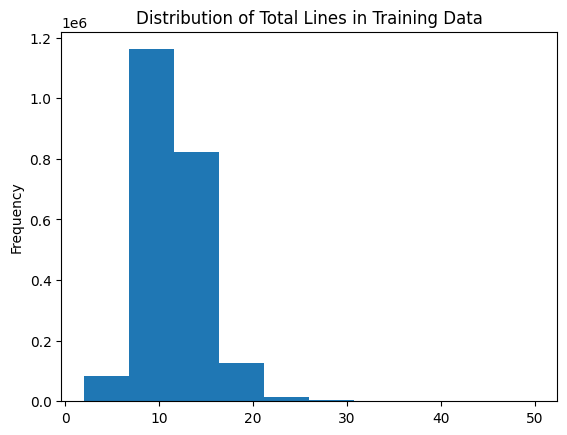

In [10]:
train_df.total_lines.plot.hist()
plt.title("Distribution of Total Lines in Training Data");

In [11]:
# Convert abstract text lines into lists
train_sentences = train_df['text'].tolist()
val_sentences = val_df['text'].tolist()
test_sentences = test_df['text'].tolist()

In [12]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df['target'].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df['target'].to_numpy().reshape(-1, 1))

In [13]:
# Get class names and number of classes from LabelEncoder instance
class_names = one_hot_encoder.categories_[0]
num_classes = len(class_names)
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))